In [2]:
#https://www.youtube.com/watch?v=QIUxPv5PJOY

In [3]:
#import the libraries

In [4]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
# getting the stock data

start='2012-01-01'
end='2019-12-17'
df=web.DataReader("AAPL",data_source="yahoo",start='2012-01-01', end='2019-12-17')

In [6]:
df.shape

(2004, 6)

In [7]:
#visualize closing price

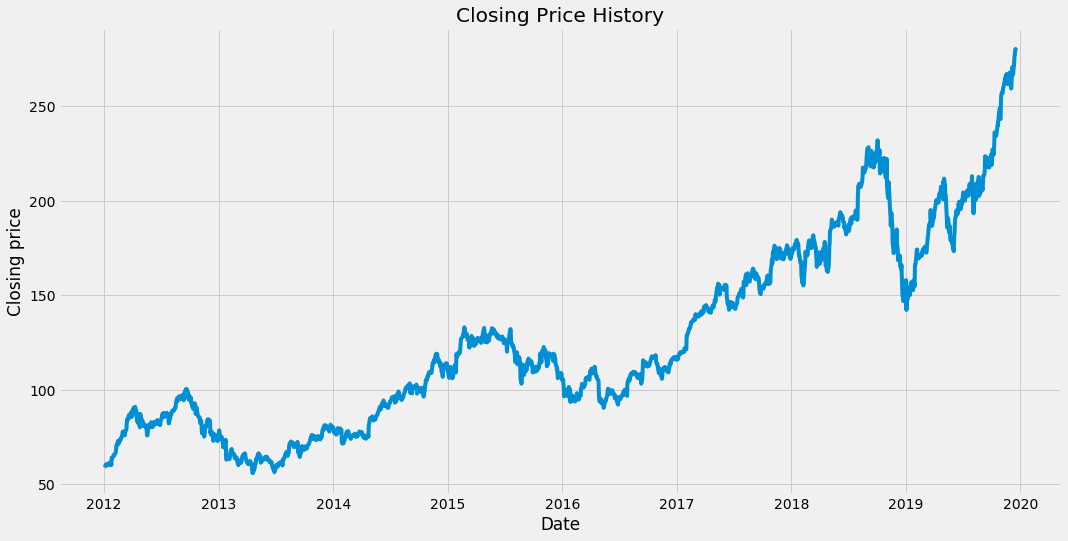

In [8]:
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.show()

In [9]:
#Create a new dataframe with only close column

In [10]:
data=df.filter(['Close'])

In [11]:
#Converting a dataset to a Nympy Array
dataset=data.values

In [12]:
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

1604

In [13]:
#Scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.99755134],
       [1.        ],
       [0.99701712]])

In [14]:
#Creating train set
#Creating scaled dataset

train_data=scaled_data[0:training_data_len, :]
train_data.shape

# Split data into train X and Train Y
y_train=[]
x_train=[]

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [15]:
#convert x train and y train to numpy arrays
x_train,y_train=np.array(x_train), np.array(y_train)


In [16]:
#reshape the data
x_train.shape
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1544, 60, 1)

In [17]:
#Build the LSTM model

model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [19]:
#train the model
model.fit(x_train,y_train, batch_size=1,epochs=1)

Epoch 1/1
1544/1544 [==============================] - 141s 91ms/step - loss: 8.6678e-04


In [20]:
# Creating testing dataset
test_data=scaled_data[training_data_len-60: , : ]
#creating x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [21]:
#convert data to a numpy array
x_test=np.array(x_test)

In [22]:
#reshape the data
x_test.shape

(400, 60)

In [23]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [24]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [25]:
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

6.597179667962376

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


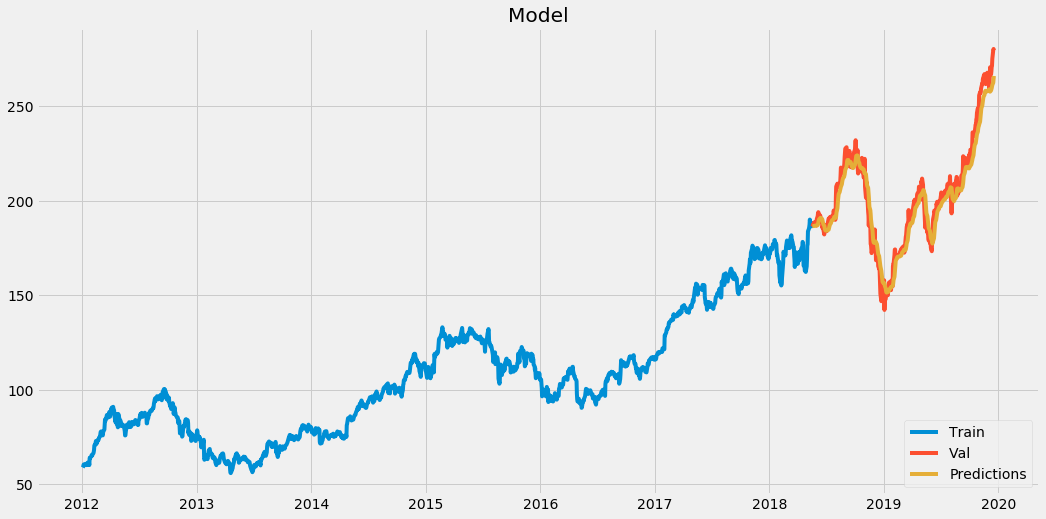

In [137]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']= predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel="date"
plt.ylabel="close price USD"
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc="lower right")
plt.show()


In [27]:
# try to use other models

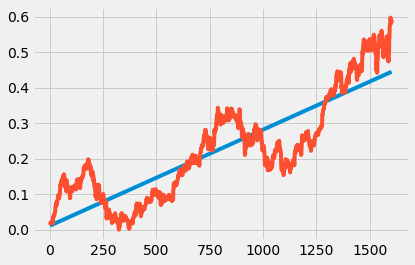

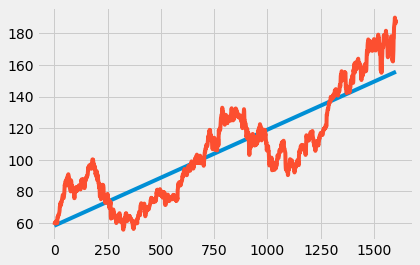

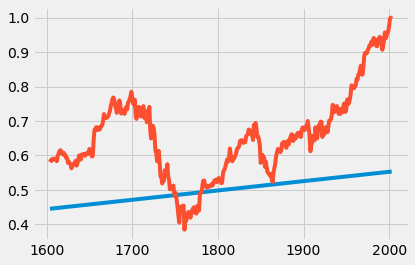

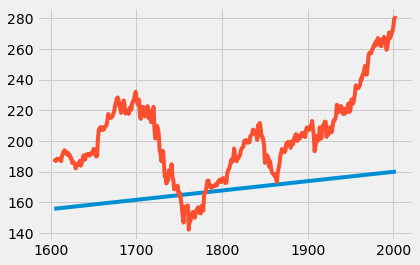

1872.553149657594

In [135]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
x_tr=x_tr.reshape(-1,1)
linmodel=LinearRegression()
linmodel_tr=linmodel.fit(x_tr,df_train)
plt.plot(x_tr,linmodel_tr.predict(x_tr))
plt.plot(x_tr,df_train)
plt.show()

train_pred=scaler.inverse_transform(linmodel_tr.predict(x_tr))
train_=scaler.inverse_transform(df_train)

plt.plot(x_tr,train_pred)
plt.plot(x_tr,train_)
plt.show()

dif_sq=(linmodel_tr.predict(x_tr)-df_train)**2
MSE_tr=np.mean(dif_sq)
MSE_tr


dif_sq2=(train_pred-train_)**2
MSE_tr_true=np.mean(dif_sq2)
MSE_tr_true


# So we can see that when we use linear model for prediction the training MSE is huge


# Now let's check our model on the training set
x_test=np.arange(1604,2004)
x_test=x_test.reshape(-1,1)
plt.plot(x_test,linmodel_tr.predict(x_test))
plt.plot(x_test,df_test)
plt.show()

test_pred=scaler.inverse_transform(linmodel_tr.predict(x_test))
test_=scaler.inverse_transform(df_test)

plt.plot(x_test,test_pred)
plt.plot(x_test,test_)
plt.show()

dif_sq_test=(linmodel_tr.predict(x_test)-df_test)**2
MSE_test=np.mean(dif_sq_test)
MSE_test


dif_sq2_t=(test_pred-test_)**2
MSE_test_true=np.mean(dif_sq2_t)
MSE_test_true



In [136]:
# So, even i did not calculate the MSE for LSTM it can be seen clearly that LSTM outperform linear model significantly. 
# I would say it's because i used dates as an dependent variable. I guess linear model can be more precise if we will choose
#significant and important variables for the stock price